# Project - Logical Arcitecture Elements Study 

This is a study that will use properties in the a Capella model to perform a study on the number of solar panels required to satisfy various a few usage scenarios.

Access the System Model that is in GitHUB folder with a python module "caplellambse" that can read and modify the SMW/Capella model content.

In [1]:
import capellambse
import ipywidgets as widgets
from IPython.core.display import HTML
import numpy as np
import pandas as pd 
from IPython.display import Markdown

resources = {
    "Trail_Power_for_Campgrounds": "Trail_Power_for_Campgrounds/Trail Power for Campgrounds",
}
path_to_model = "../Trail Power.aird"
model = capellambse.MelodyModel(path_to_model, resources=resources)

Display a diagram from the capella module with parameters being accessed. Note that this diagram is not being pulled dynamically, due to the desire to see the parameters on the diagram. It is pulling a snapshot of a .jpg diagram.

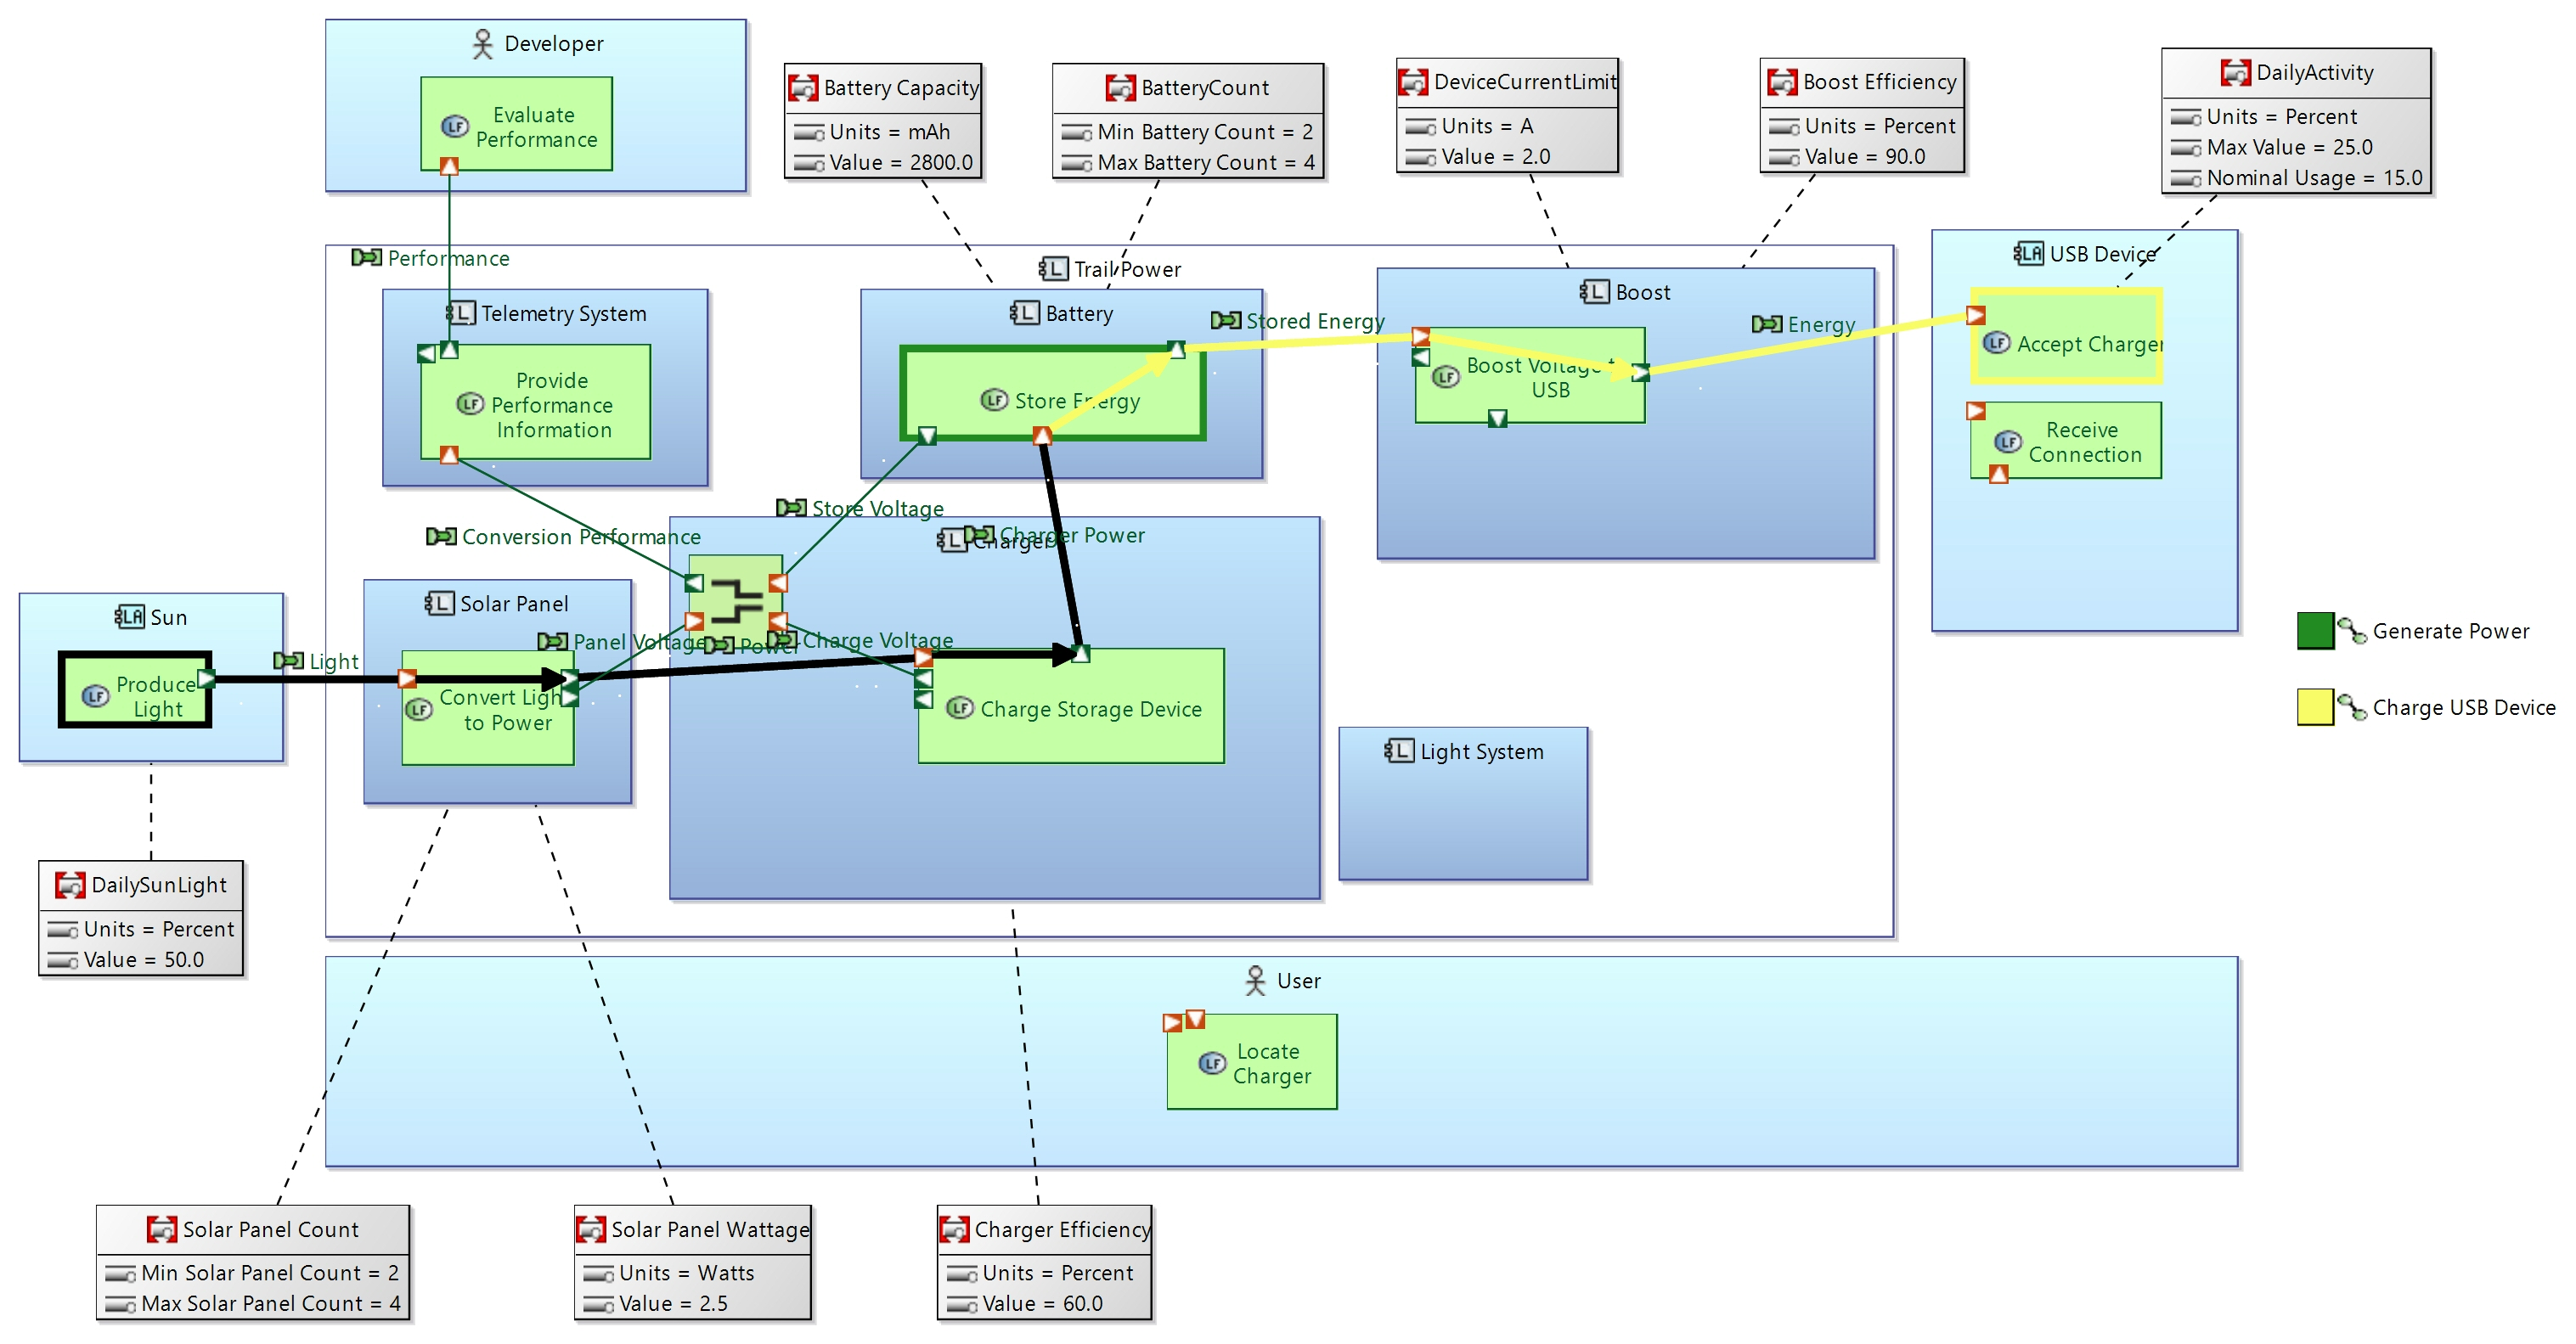

In [2]:
from IPython import display as diag_display
diag_display.Image("../Images/[LAB] Trail Power (Charge) Properties.jpg")


## Display of all the parameters and respective components/functions in the logical architecture
The following is a report of all the parameters avialable to be used from the logical architecture. 

In [3]:
la_model = model.la 

df = pd.DataFrame({
    'Logical Function': [],
    'Property Value Group Name': [],
    'Propery Name': [],
    'Property Value': [],
    })

for function in la_model.all_functions:
    for pvg in  function.applied_property_value_groups :
        for pv in  pvg.property_values:
            #print("LogicalFunction=",'"' +function.name+ '"',"property_value_groups=",'"' +pvg.name+ '"','"Property Name"=','"' +pv.name+ '"','"Value"=',pv.value )
            df.loc[len(df)] = [function.name,pvg.name,\
                                pv.name, pv.value]
display(df)
df = pd.DataFrame({
    'Logical Component': [],
    'Property Value Group Name': [],
    'Propery Name': [],
    'Property Value': [],
    })
for component in la_model.all_components:
    for pvg in  component.applied_property_value_groups :
        for pv in  pvg.property_values:
            #print("LogicalComponents=",'"' +component.name+ '"',"property_value_groups=",'"' +pvg.name+ '"','Property Name=','"' + pv.name + '"','Value=',pv.value  )
            df.loc[len(df)] = [component.name,pvg.name,\
                                pv.name, pv.value]
display(df)

Logical Function Property Value Group Name   Propery Name Property Value
0   Accept Charger             DailyActivity          Units        Percent
1   Accept Charger             DailyActivity      Max Value           25.0
2   Accept Charger             DailyActivity  Nominal Usage           15.0

Logical Component Property Value Group Name           Propery Name  \
0              Boost          Boost Efficiency                  Units   
1              Boost          Boost Efficiency                  Value   
2              Boost        DeviceCurrentLimit                  Units   
3              Boost        DeviceCurrentLimit                  Value   
4            Battery          Battery Capacity                  Units   
5            Battery          Battery Capacity                  Value   
6            Battery              BatteryCount      Min Battery Count   
7            Battery              BatteryCount      Max Battery Count   
8        Solar Panel       Solar Panel Wattage                  Units   
9        Solar Panel       Solar Panel Wattage                  Value   
10       Solar Panel         Solar Panel Count  Min Solar Panel Count   
11       Solar Panel         Solar Panel Count  Max Solar Panel Count   
12           Charger        Charger Efficiency                  Units   
13           Charger        Charger Efficiency                  Value   
14               Sun             DailySunLight                  Units   
15               Sun             DailySunLight                  Value   

   Property Value  
0         Percent  
1            90.0  
2               A  
3             2.0  
4             mAh  
5          2800.0  
6               2  
7               4  
8           Watts  
9             2.5  
10              2  
11              4  
12        Percent  
13           60.0  
14        Percent  
15           50.0

The following code can be used in the study to retrive the value from the model to use in the study.

your_variable = model.search("LogicalFunction").by_name("Name of Function").property_value_groups["Name of property Value Group"]["Name of Property"])

your_variable = model.search("LogicalComponent").by_name("Name of Component").property_value_groups["Name of property Value Group"]["Name of Property"])

You can see an example below.

In [4]:
print( "Battery Size" , model.search("LogicalComponent").by_name("Battery").property_value_groups["Battery Capacity"]["Value"] ,\
"Units:" ,model.search("LogicalComponent").by_name("Battery").property_value_groups["Battery Capacity"]["Units"])

Battery Size 2800.0 Units: mAh


# Analysis by Functional Chain
Typically analysis could be done by functional chain. You may even want leverage content of the model to define variable in your study.

In [5]:



for fc in model.la.all_functional_chains:
    #print(fc)
    print()
    #print("Functional Chain:", fc.name)
    display(Markdown(f"# Functional Chain: {fc.name}"))


    df = pd.DataFrame({
    'Function Owner': [],
    'Function': [],
    'Function Out Ports': [],
    'Function Exchange': [],
    'Function Exchange Items': [],
    'Function Exchange Item Elements': [],
    })
    def Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                                Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE) :
        df.loc[len(df)] = [Current_Function_Owner ,Current_Function,\
                                Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE]
        
    for function in fc.involved_functions:
        #This will initialize all the table elements
        Current_Function_Owner = ''
        Current_Function =''
        Current_Function_OPort =''
        Current_Function_Exchange = ''
        Current_Function_Exchange_EI = ''
        Current_Function_Exchange_EIE = ''
        
        #print(function.owner)
        if function.owner != None :
         
            Current_Function_Owner=function.owner.name
            #print("- Entity:",Current_Function_Owner)
            #print("-Function:",function.name)
            Current_Function = function.name
            #print("-Function:",Current_Function)
           
            
            #print("---Exch:",exchange.name)
            for output in function.outputs:
               # print(output)
                is_FOs= True
                Current_Function_OPort = output.name
                #Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                #                 Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)
                for exchange in output.exchanges:         
                    for involved_exchange in fc.involved_links:
                         if exchange == involved_exchange:
                             Current_Function_Exchange = exchange.name
                             #print("--Output:",output.name)
                             #print("---Exch:",Current_Function_Exchange)
                             
                             for exchange_item in exchange.exchange_items: 
                                 Current_Function_Exchange_EI = exchange_item.name
                                 #print("--Output:",output.name)
                                 #print(exchange_item)
                                 #print("---Exch Item:",Current_Function_Exchange_EI)

                                 for element in exchange_item.elements: 
                                     Current_Function_Exchange_EIE = element.name
                                     #print(element)
                                     #print("---Exch Item Elements:",Current_Function_Exchange_EIE)
                                     Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                                        Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)
                                 if  exchange_item.elements ==  []:
                                     Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                                    Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE) 
                             if exchange.exchange_items == [] :
                                Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                                Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE) 
            if  function.outputs == []:
                Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                    Current_Function_OPort,  Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)
        else: 
            Current_Function_Owner="None"
            print("-Entity","None")
            Current_Function = function.name
            print("-Function",Current_Function )

            for output in function.outputs:  
                Current_Function_OPort = output.name
                Current_Function_OPort = output.name
                #Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                #    Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)
                for exchange in output.exchanges:
                   for involved_exchange in fc.involved_links:
                         if exchange == involved_exchange:
                             
                             
                             Current_Function_Exchange = exchange.name
                             #print("--Output:",output.name)
                             #print("---Exch:",Current_Function_Exchange)
                             if exchange.exchange_items == [] :
                                 Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                                 Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)   
                             for exchange_item in exchange.exchange_items: 
                                 Current_Function_Exchange_EI = exchange_item.name
                                 #print("--Output:",output.name)
                                 #print(exchange_item)
                                 #print("---Exch Item:",Current_Function_Exchange_EI)
                                 
                                 
                                 for element in exchange_item.elements: 
                                     Current_Function_Exchange_EIE = element.name
                                     #print(element)
                                     #print("---Exch Item Elements:",Current_Function_Exchange_EIE)
                                     Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                                       Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)
                                 if exchange_item.elements == []:
                                     Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                                    Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE) 
                             if exchange.exchange_items == [] :
                                 Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                                 Current_Function_OPort, Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)    
                               
            if  function.outputs == []:
                Append_Row_to_Dataframe(df,  Current_Function_Owner ,Current_Function,\
                    Current_Function_OPort,  Current_Function_Exchange , Current_Function_Exchange_EI, Current_Function_Exchange_EIE)                                 

    

    display(df)
        


# Functional Chain: Provide 24 hour visibility

Function Owner                    Function Function Out Ports  \
0           User              Locate Charger                      
1          Boost        Boost Voltage to USB              FOP 3   
2        Charger  Supply power when no light              FOP 1   
3   Light System                Power Lights   outCharger Light   
4        Charger       Charge Storage Device              FOP 3   

  Function Exchange Function Exchange Items Function Exchange Item Elements  
0                                                                            
1        Illuminate                                                          
2             Power                                                          
3     Charger Light                                                          
4       Light Power

# Functional Chain: Charge USB Device

Function Owner              Function Function Out Ports Function Exchange  \
0     USB Device        Accept Charger                                        
1          Boost  Boost Voltage to USB          outEnergy            Energy   

  Function Exchange Items Function Exchange Item Elements  
0                                                          
1               USB Power                      USB Signal

# Functional Chain: Generate Power

Function Owner                Function Function Out Ports Function Exchange  \
0            Sun           Produce Light              FOP 1             Light   
1    Solar Panel  Convert Light to Power              FOP 1             Power   
2        Charger   Charge Storage Device              FOP 1     Charger Power   

  Function Exchange Items Function Exchange Item Elements  
0                   Light                           Light  
1             Panel Power                 PanelPanelPower  
2           Charger Power                  PowerGenerator

# Functional Chain: Provide Status

Function Owner                         Function  \
0                 Operator                   Receive Status   
1  Charger Tracking System                      Send Status   
2  Charger Tracking System   Gather Performance Information   
3         Telemetry System  Provide Performance Information   

  Function Out Ports        Function Exchange Function Exchange Items  \
0                                                                       
1          outStatus                   Status                           
2              FOP 1                  Status                            
3              FOP 2  Performance Information                           

  Function Exchange Item Elements  
0                                  
1                                  
2                                  
3

# Functional Chain: Connect USB Device

Function Owner              Function     Function Out Ports  \
0           User        Comprend State               outState   
1        Charger         Provide State       outCharger State   
2           User        Connect Device  outDevice Connection    
3           User        Connect Device  outCharger Connection   
4     USB Device    Receive Connection                          
5          Boost   Receive Connection                           
6          Boost  Boost Voltage to USB                  FOP 2   

    Function Exchange Function Exchange Items Function Exchange Item Elements  
0               State                                                          
1       Charger State                                                          
2  Device Connection                                                           
3  Charger Connection                                                          
4                                                                              
5                                                                              
6               State

# Functional Chain: Monitor opertion remotely

Function Owner                         Function Function Out Ports  \
0         Developer             Evaluate Performance                      
1  Telemetry System  Provide Performance Information     outPerformance   
2           Charger                   Voltage Gather              FOP 4   
3           Charger            Charge Storage Device              FOP 4   
4       Solar Panel           Convert Light to Power              FOP 2   
5           Battery                     Store Energy            Voltage   

        Function Exchange Function Exchange Items  \
0                                                   
1             Performance                           
2  Conversion Performance                           
3          Charge Voltage                           
4           Panel Voltage                           
5           Store Voltage                           

  Function Exchange Item Elements  
0                                  
1                                  
2                                  
3                                  
4                                  
5

# Functional Chain: Disconnect Device

Function Owner           Function     Function Out Ports  \
0          Boost         Disconnect                          
1           User  Disconnect Device  outCharger Disconnect   
2           User  Disconnect Device   outDevice Disconnect   
3     USB Device         Disconnect                          

    Function Exchange Function Exchange Items Function Exchange Item Elements  
0                                                                              
1  Charger Disconnect              Disconnect                                  
2   Device Disconnect              Disconnect                                  
3

# Functional Chain: Provide Location

Function Owner                      Function Function Out Ports  \
0                 Operator              Receive Location                      
1  Charger Tracking System  Gather Location from Charges        outLocation   
2         Telemetry System              Provide location              FOP 1   
3         Telemetry System             Compute Location               FOP 1   
4                      GPS              Provide Location              FOP 1   

        Function Exchange Function Exchange Items  \
0                                                   
1                Location                           
2  Location from Chargers                           
3           Location Data                           
4       Sattelit Location                           

  Function Exchange Item Elements  
0                                  
1                                  
2                                  
3                                  
4

In [6]:
from sympy import symbols, Piecewise, sin, pi, Heaviside, integrate, And, simplify
import numpy as np

import sympy as sp
import pandas as pd 
import plotly.express as px

from scipy.integrate import simpson
from scipy.stats import kendalltau

In [7]:
t = symbols('t')
period = symbols('period')


In [8]:


# Define the pulse function
def pulse(t, start, width):
    return Piecewise(
        (1, And(t >= start, t < start + width)),
        (0, True)
    )

# Define a pulse train that operates over a specified time length
def pulse_train(t, pulse_width, period, total_time):
    # Calculate the number of pulses that fit within the total time
    num_pulses = int(total_time // period)
    
    # Generate the pulse train expression
    return sum(pulse(t, start=i*period, width=pulse_width) for i in range(num_pulses))


def power_generator(t, pulse_width, period, total_time,  SP_Power, charger_eff ):
    return (charger_eff/100) *SP_Power * pulse_train(t, pulse_width, period, total_time)
    

def battery_load(t,  pulse_width, period, total_time, USB_Current,Boost_Efficiency):
    return USB_Current * 5.0  * ((1 - Boost_Efficiency/100)+1) * pulse_train(t, pulse_width, period, total_time)
    


In [9]:
sun_period_value = model.search("LogicalComponent").by_name("Sun").property_value_groups["DailySunLight"]["Value"] # Example period of 12 hours for .50
load_period_value = model.search("LogicalFunction").by_name("Accept Charger").property_value_groups["DailyActivity"]["Max Value"]  # Example period of 12 hours for .50
panel_power = model.search("LogicalComponent").by_name("Solar Panel").property_value_groups["Solar Panel Wattage"]["Value"] 
solar_panel_count_min = model.search("LogicalComponent").by_name("Solar Panel").property_value_groups["Solar Panel Count"]["Min Solar Panel Count"]
solar_panel_count_max = model.search("LogicalComponent").by_name("Solar Panel").property_value_groups["Solar Panel Count"]["Max Solar Panel Count"]
boost_efficiency = model.search("LogicalComponent").by_name("Boost").property_value_groups["Boost Efficiency"]["Value"]
boost_current_limit = model.search("LogicalComponent").by_name("Boost").property_value_groups["DeviceCurrentLimit"]["Value"]
charger_eff =model.search("LogicalComponent").by_name("Charger").property_value_groups["Charger Efficiency"]["Value"]
battery_capacity =model.search("LogicalComponent").by_name("Battery").property_value_groups["Battery Capacity"]["Value"]/1000 
battery_count_min = model.search("LogicalComponent").by_name("Battery").property_value_groups["BatteryCount"]["Min Battery Count"]
battery_count_max = model.search("LogicalComponent").by_name("Battery").property_value_groups["BatteryCount"]["Max Battery Count"]

display(Markdown(f"# Formulas for Power Generator, BatteryLoad and Battery Charge and constant values for Study from System Model."))

display(Markdown(f" $$SunPeriod= {sun_period_value} $$"))
display(Markdown(f" $$LoadPeriod= {load_period_value} $$"))
display(Markdown(f" $$BoostEfficiency = {boost_efficiency } $$"))
display(Markdown(f" $$USBCurrent = {boost_current_limit } $$"))
display(Markdown(f" $$PowerGenerator(t) = PulseTrain(t,SunPeriod* 24/100,24,24*7)*SolarPanelPower * ChargerEfficiency/100 $$"))
display(Markdown(f" $$BatteryLoad(t) = PulseTrain(t,LoadPeriod * 24/100,24 , 24*7) * USBCurrent * ((1 - BoostEfficiency/100)+1)   $$"))
display(Markdown(f" $$TotalPower(t) = PowerGenerator(t) - BatteryLoad(t)  $$"))
display(Markdown(f" $$BatteryCharge  = \int_{0}^{t} TotalPower(t)\, dt$$"))

# Formulas for Power Generator, BatteryLoad and Battery Charge and constant values for Study from System Model.

 $$SunPeriod= 50.0 $$

 $$LoadPeriod= 25.0 $$

 $$BoostEfficiency = 90.0 $$

 $$USBCurrent = 2.0 $$

 $$PowerGenerator(t) = PulseTrain(t,SunPeriod* 24/100,24,24*7)*SolarPanelPower * ChargerEfficiency/100 $$

 $$BatteryLoad(t) = PulseTrain(t,LoadPeriod * 24/100,24 , 24*7) * USBCurrent * ((1 - BoostEfficiency/100)+1)   $$

 $$TotalPower(t) = PowerGenerator(t) - BatteryLoad(t)  $$

 $$BatteryCharge  = \int_0^t TotalPower(t)\, dt$$

The following study will look at the various configuations of battery count and panel count and generate graphs of Power Produced from the solar pannels, the Power Desired vs Delivered over time, Power Produced and Consumed over time, and the the Battery Charge over time. 

The best system will show Power Desired vs Delivered with the best alignment, meaning that the system is meeting the needs of the user. 
That will happen when the battery always has suffienct charge to meet the desired demands. 

The best results will also reflect the highest value for Kendal's Tau Correlation. 

# Study Configuration 1

 This is low cost option. It has the least amount of solar panels and batterys.

 $$PanelCount =  2 $$

 $$BatteryCount =  2 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 2 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 2 AH $$

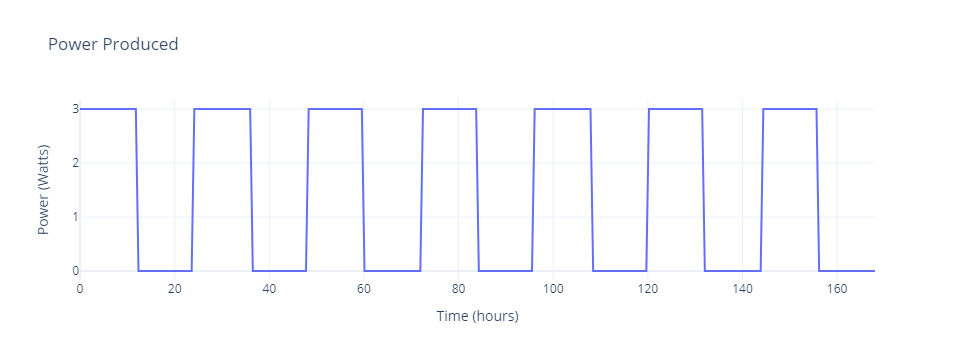

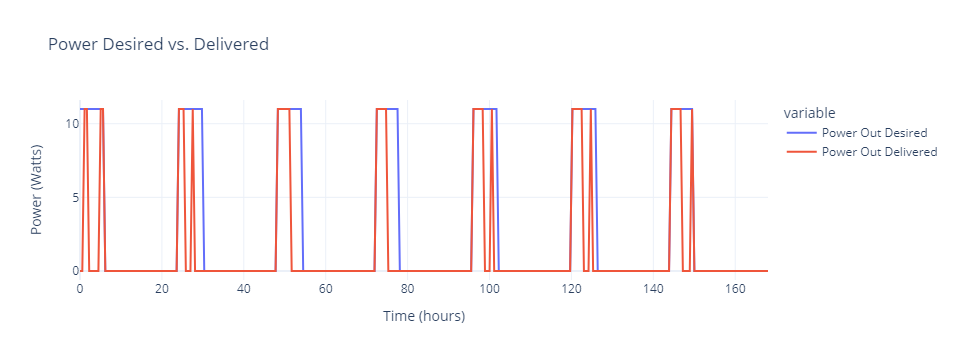

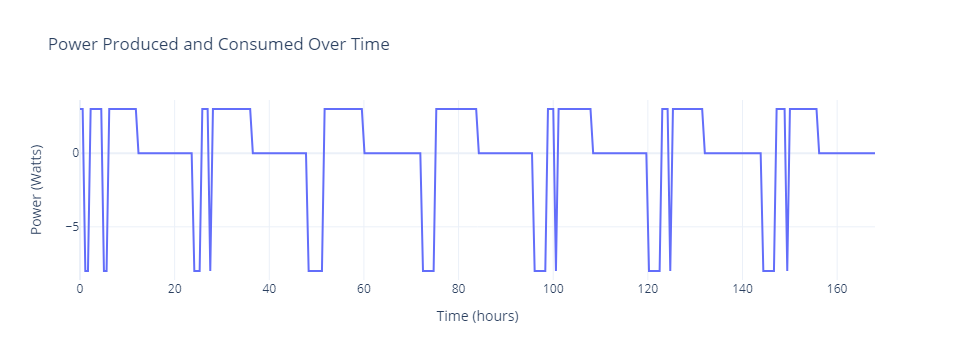

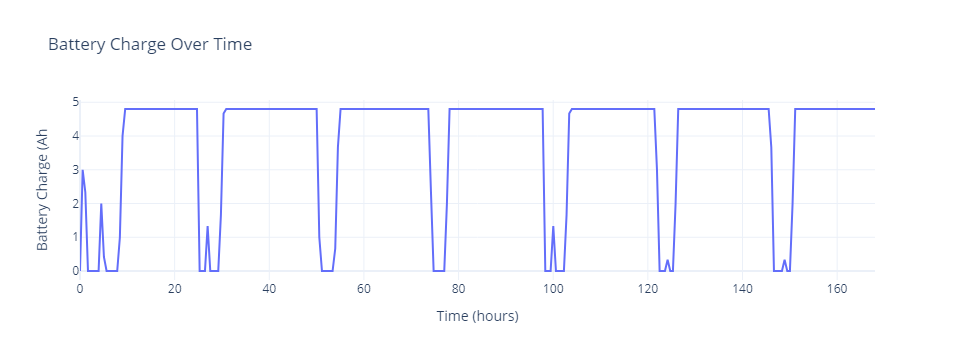

Kendall's Tau: 0.6496562413608934
P-value: 2.788587401674681e-29


# Study Configuration 2

 $$PanelCount =  2 $$

 $$BatteryCount =  3 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 2 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 3 AH $$

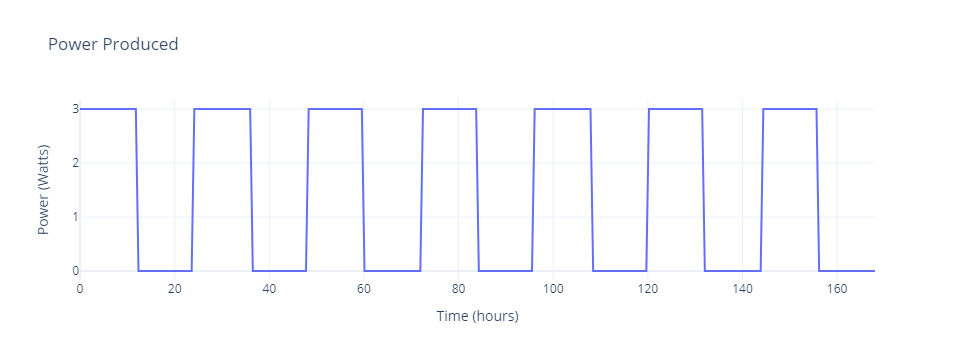

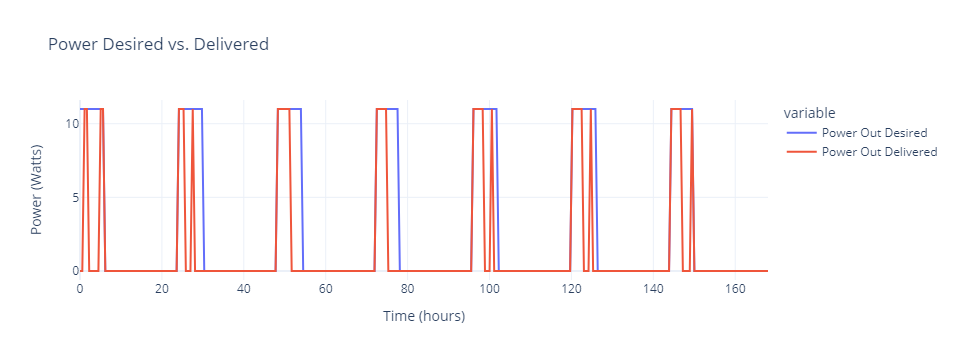

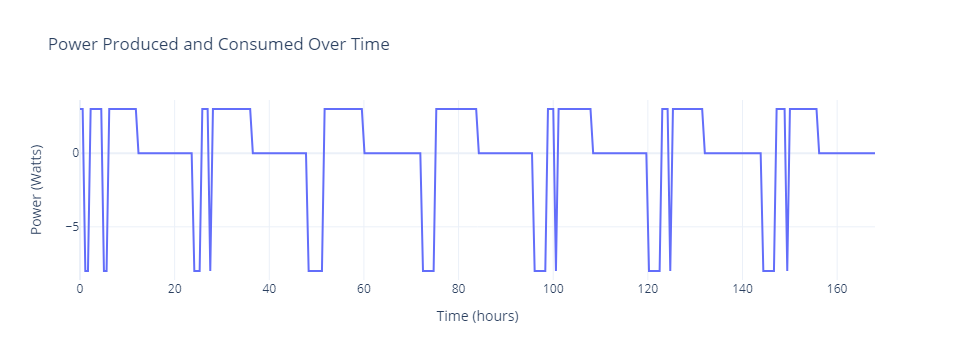

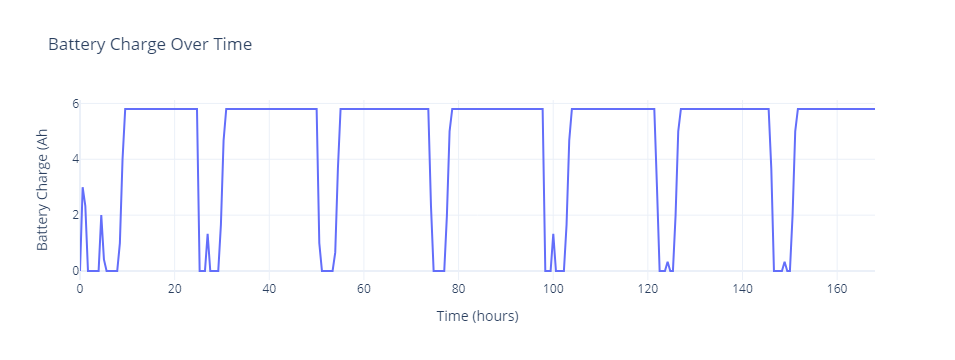

Kendall's Tau: 0.6496562413608934
P-value: 2.788587401674681e-29


# Study Configuration 3

 $$PanelCount =  2 $$

 $$BatteryCount =  4 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 2 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 4 AH $$

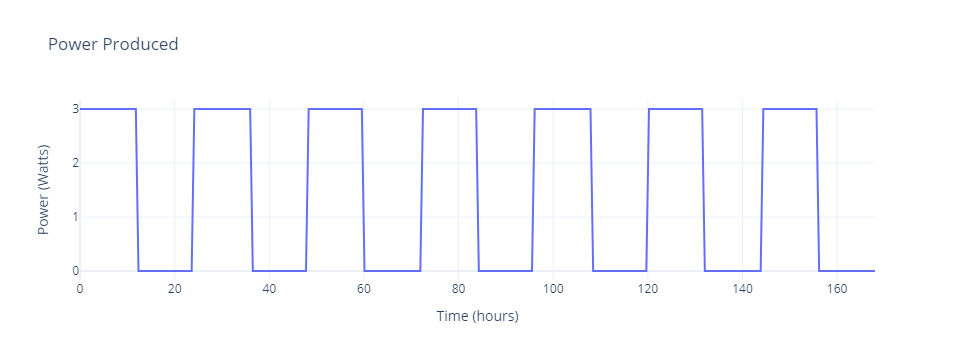

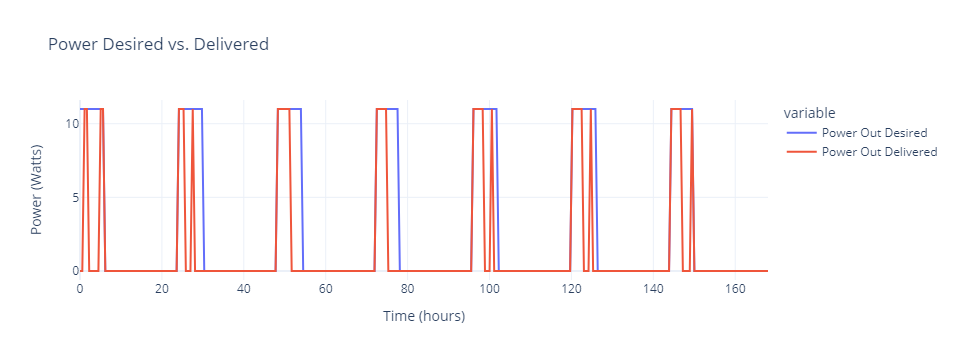

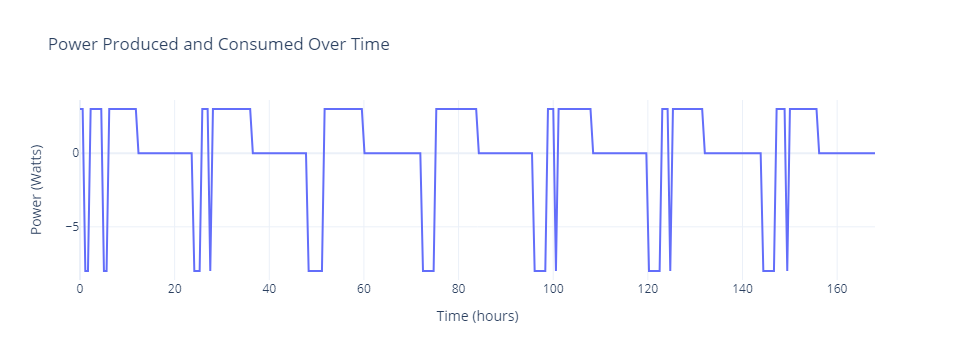

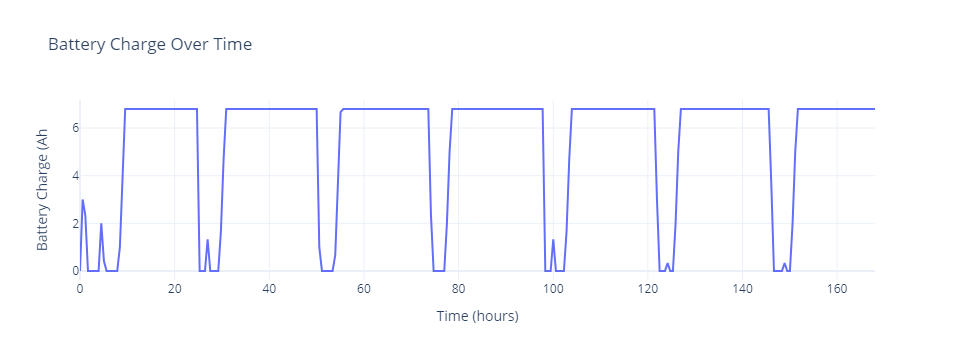

Kendall's Tau: 0.6496562413608934
P-value: 2.788587401674681e-29


# Study Configuration 4

 $$PanelCount =  3 $$

 $$BatteryCount =  2 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 3 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 2 AH $$

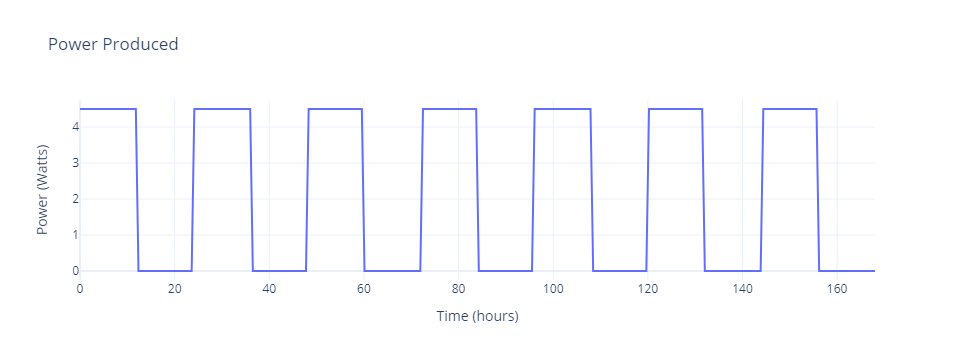

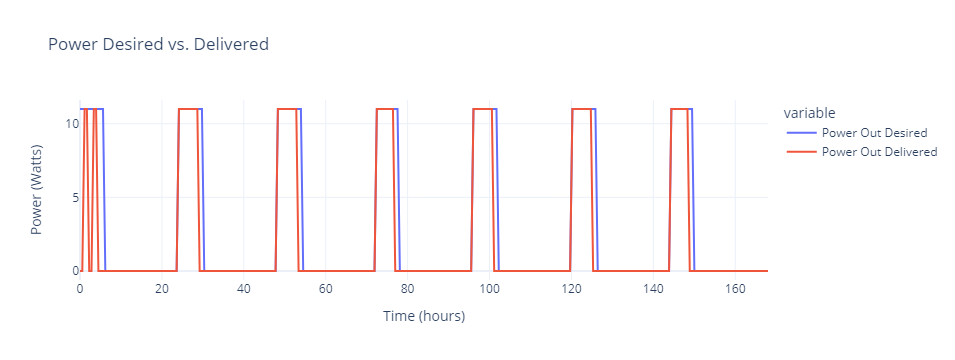

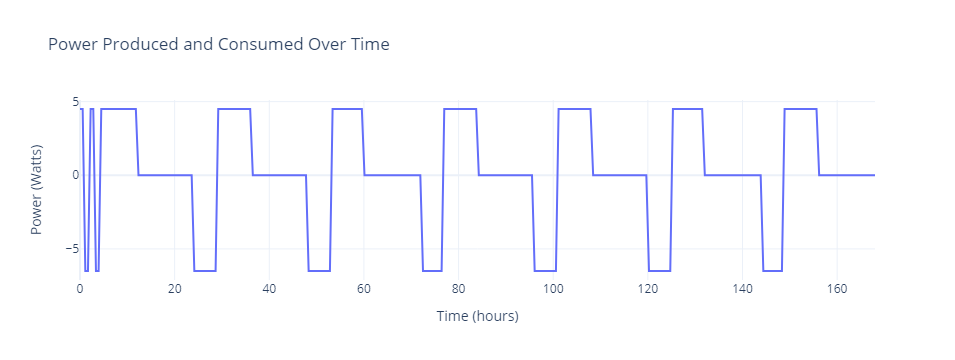

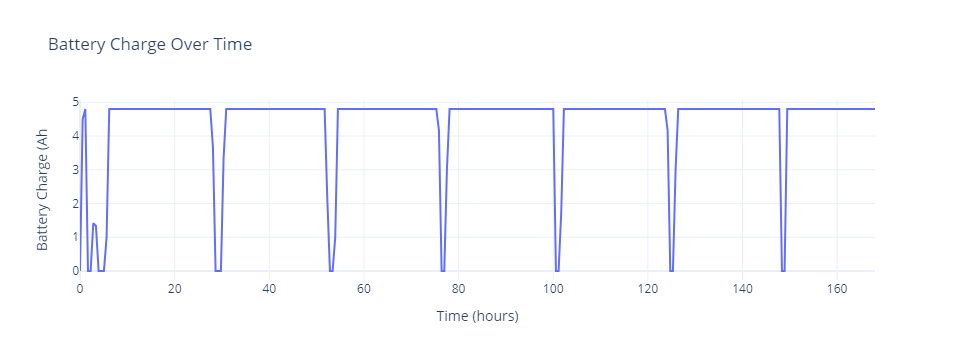

Kendall's Tau: 0.8297738186782796
P-value: 1.094477621300331e-46


# Study Configuration 5

 $$PanelCount =  3 $$

 $$BatteryCount =  3 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 3 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 3 AH $$

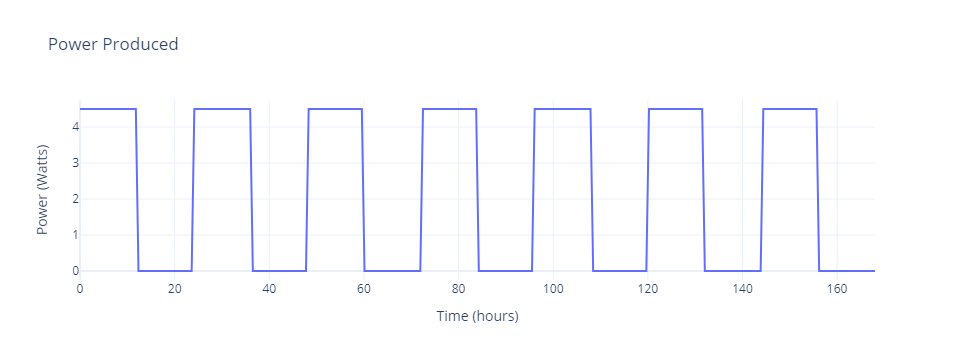

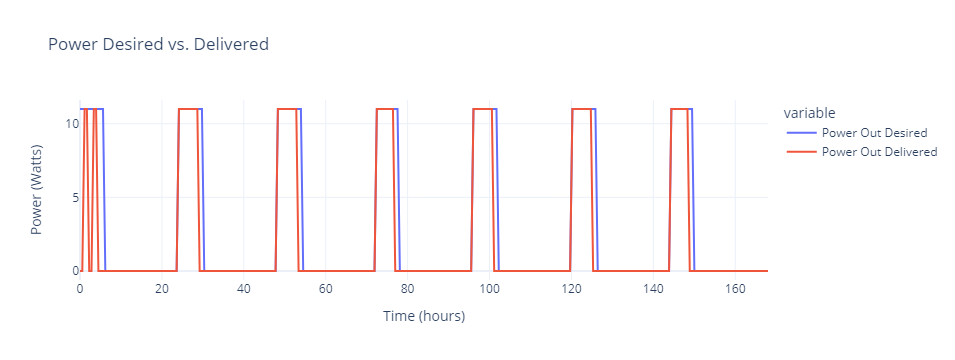

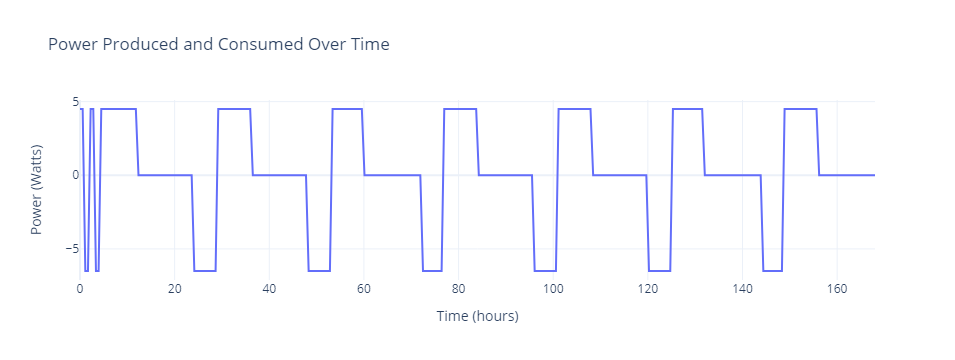

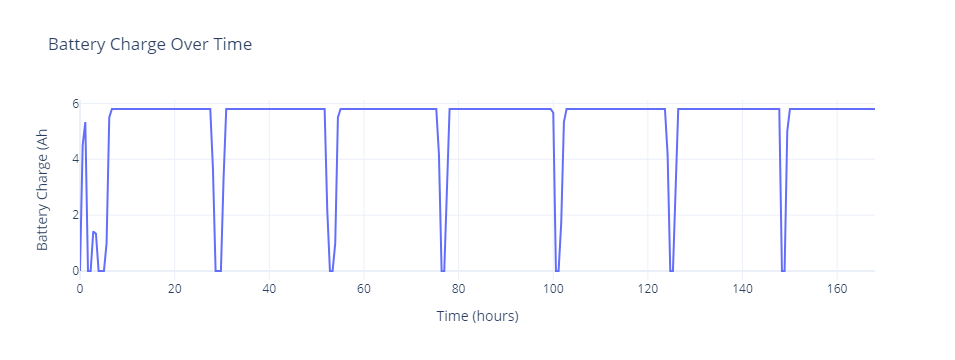

Kendall's Tau: 0.8297738186782796
P-value: 1.094477621300331e-46


# Study Configuration 6

 $$PanelCount =  3 $$

 $$BatteryCount =  4 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 3 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 4 AH $$

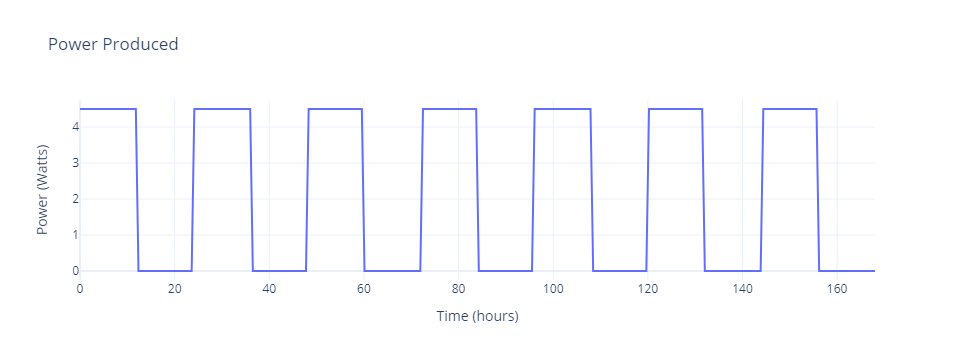

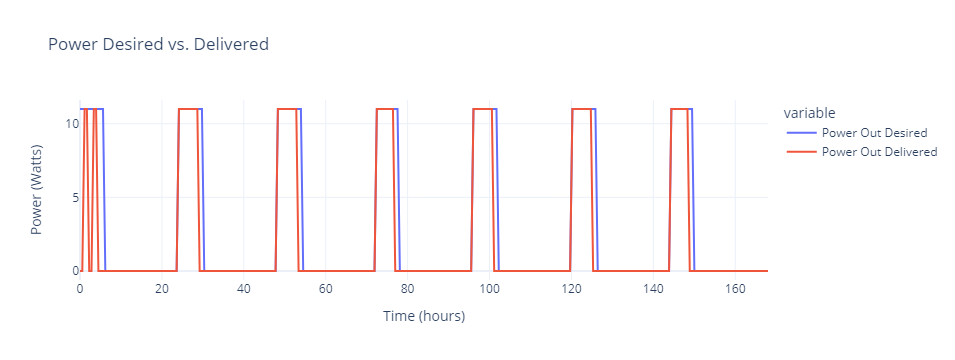

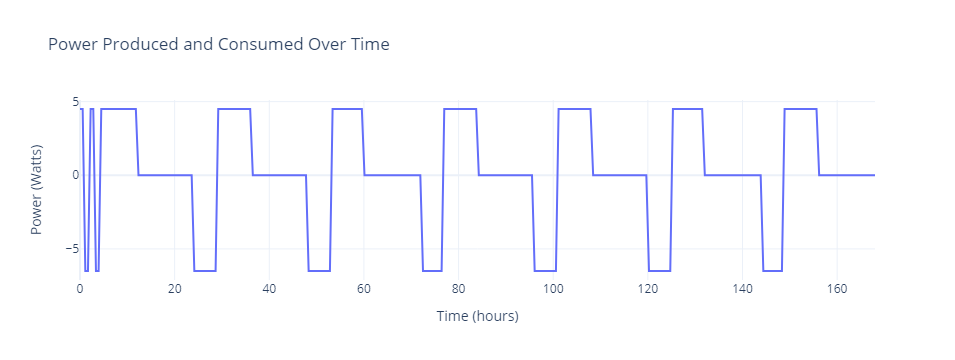

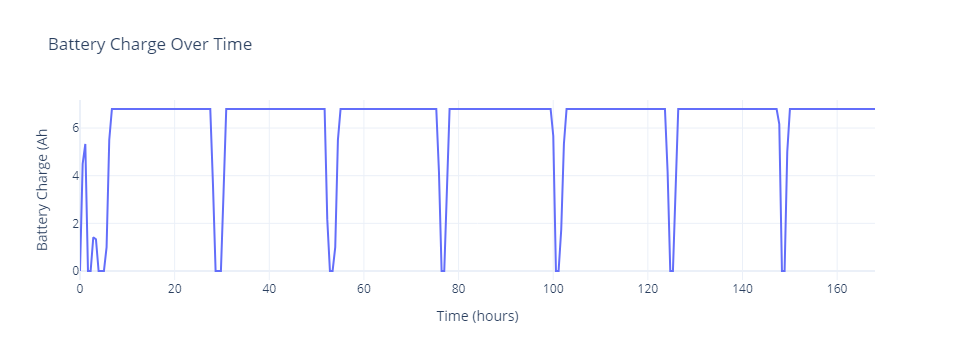

Kendall's Tau: 0.8297738186782796
P-value: 1.094477621300331e-46


# Study Configuration 7

 $$PanelCount =  4 $$

 $$BatteryCount =  2 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 4 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 2 AH $$

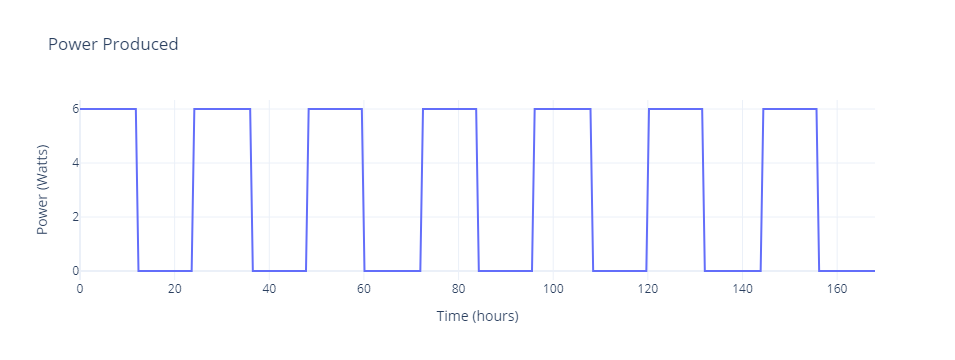

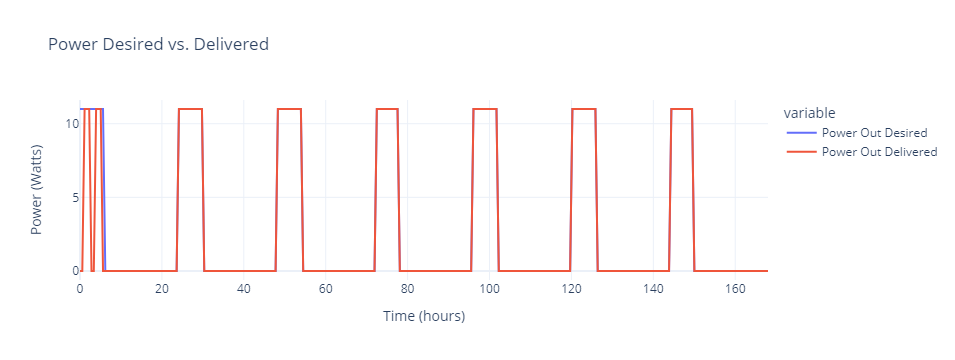

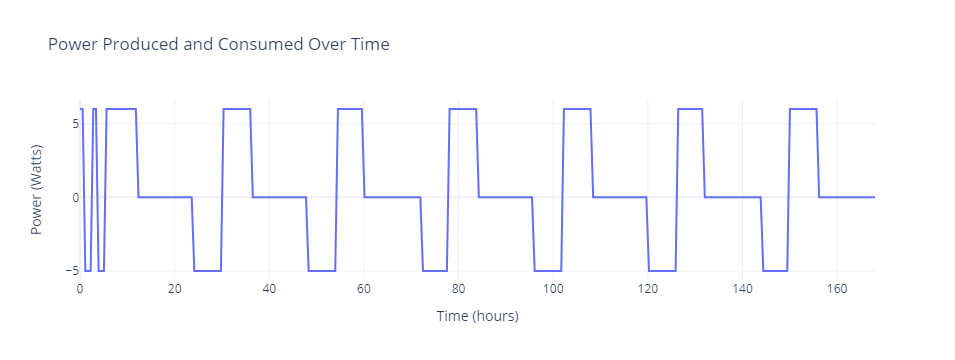

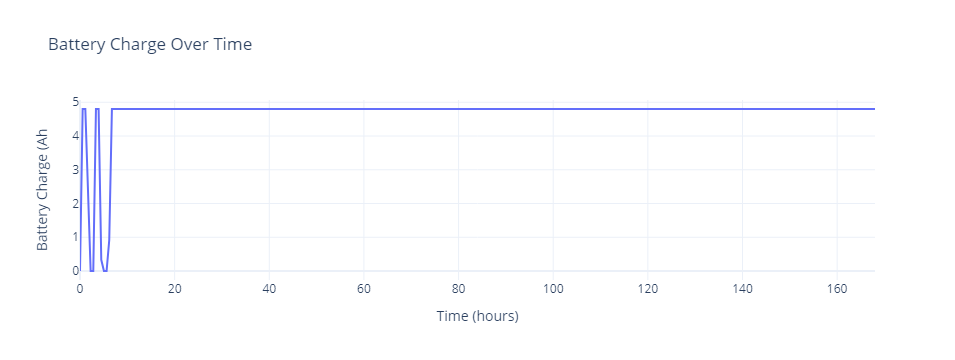

Kendall's Tau: 0.9555330859059091
P-value: 2.5181723285189077e-61


# Study Configuration 8

 $$PanelCount =  4 $$

 $$BatteryCount =  3 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 4 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 3 AH $$

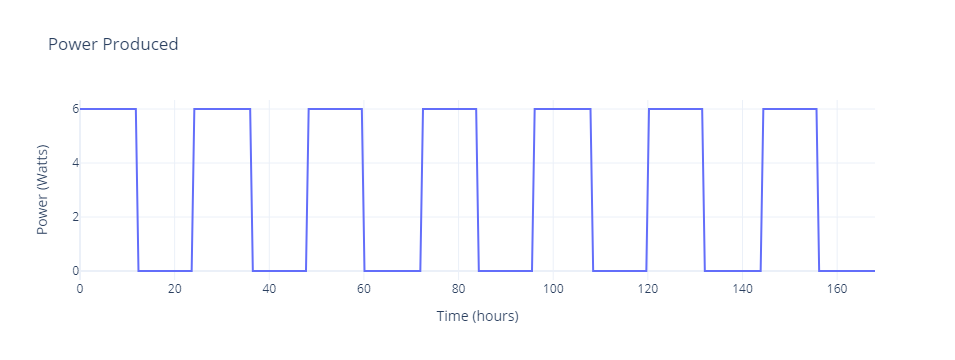

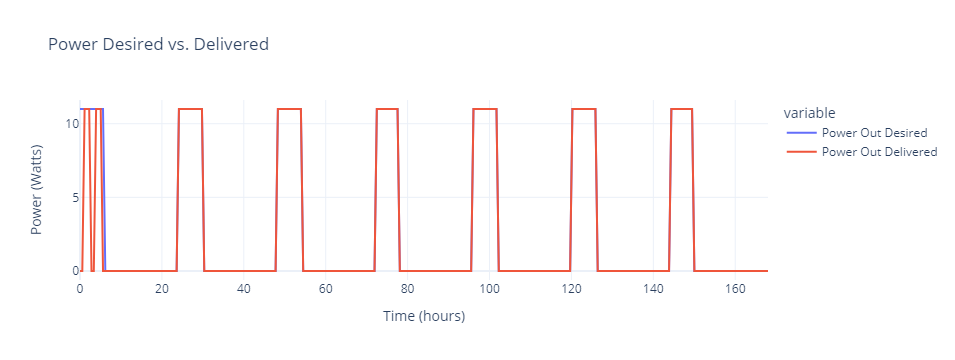

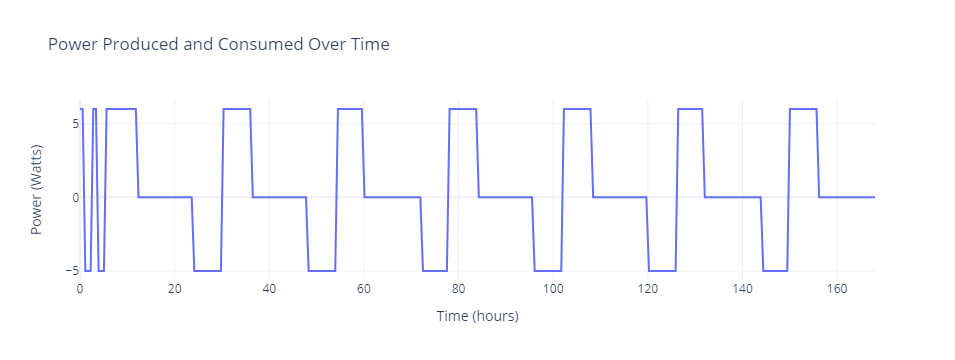

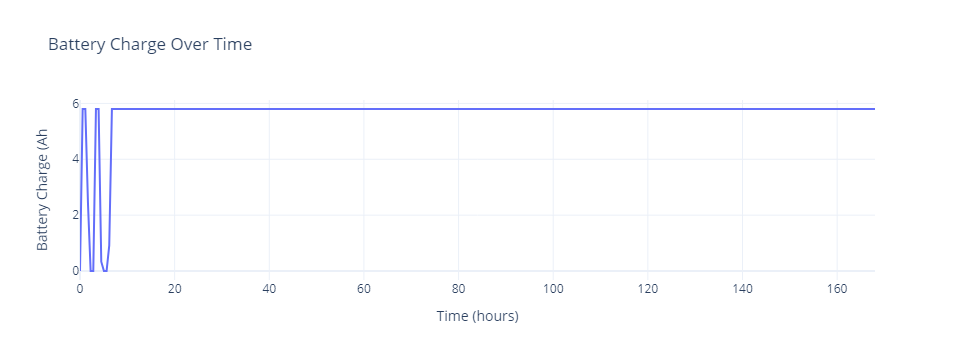

Kendall's Tau: 0.9555330859059091
P-value: 2.5181723285189077e-61


# Study Configuration 9

 This is the highest cost option. It has the hightest amount of solar panels and batterys.

 $$PanelCount =  4 $$

 $$BatteryCount =  4 $$

 $$SolarPanelPower= PanelPower * PanelCount =  2.5 * 4 $$

 $$BatteryCapacity = BatteryCapactiy * BatteryCount = 2.8 * 4 AH $$

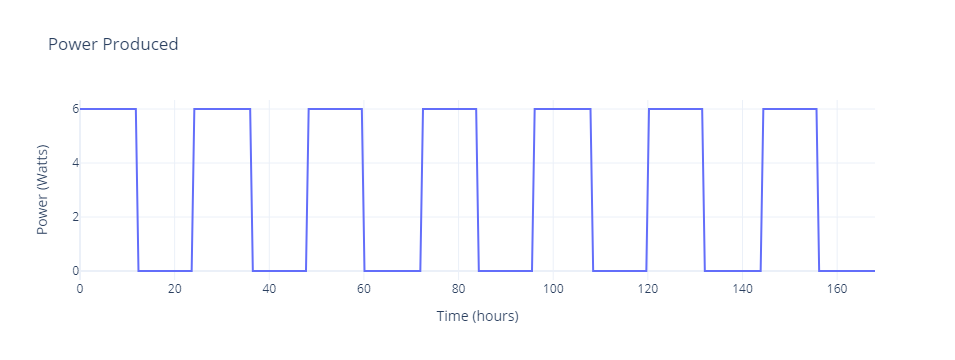

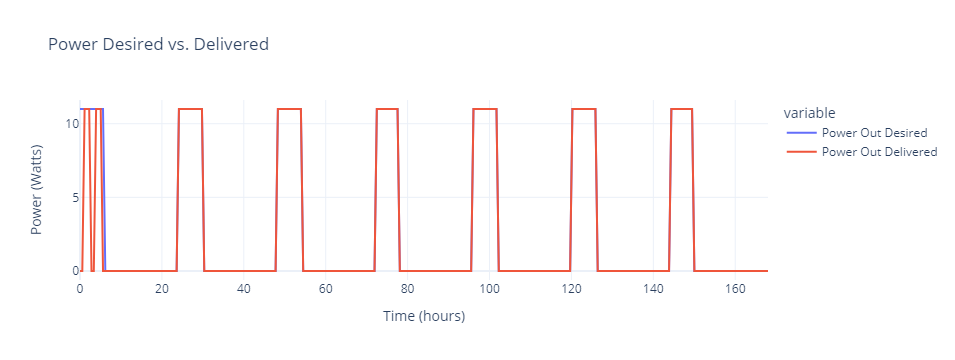

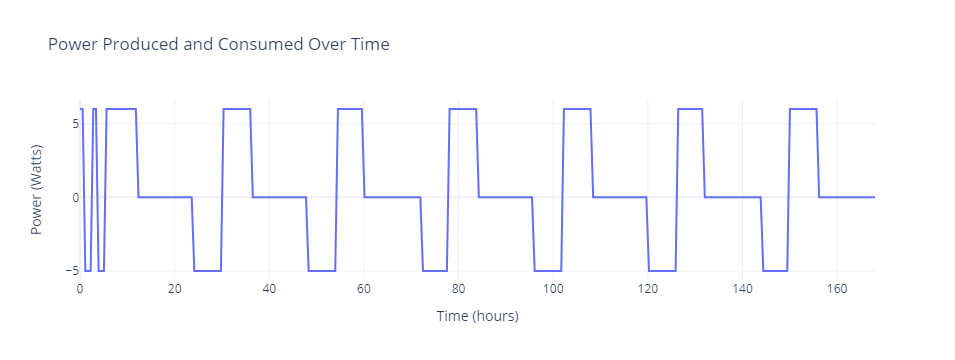

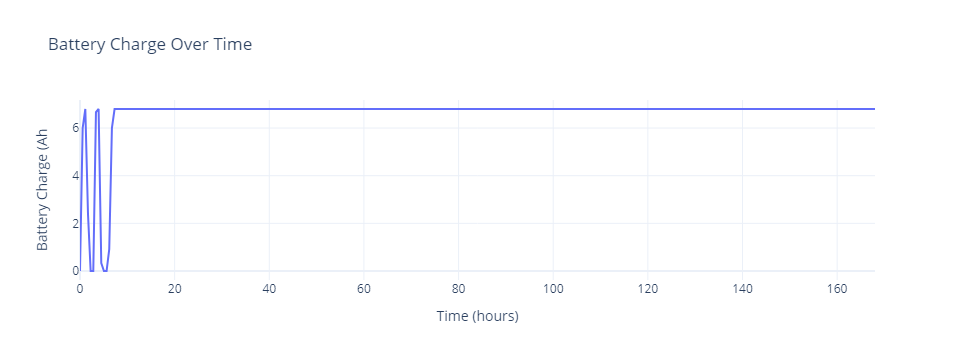

Kendall's Tau: 0.9555330859059091
P-value: 2.5181723285189077e-61


In [10]:
panel_count = solar_panel_count_min 
study = 1
while panel_count <= solar_panel_count_max :
    #print("panel_count",panel_count)
    battery_count = battery_count_min
    while battery_count <= battery_count_max:
        #print("battery_count",battery_count)
        display(Markdown(f"# Study Configuration {study}"))
        if study == 1:
            display(Markdown(f" This is low cost option. It has the least amount of solar panels and batterys."))
        if study == 9:
            display(Markdown(f" This is the highest cost option. It has the hightest amount of solar panels and batterys.")) 
        display(Markdown(f" $$PanelCount =  {panel_count} $$"))
        display(Markdown(f" $$BatteryCount =  {battery_count} $$"))
        display(Markdown(f" $$SolarPanelPower= PanelPower * PanelCount =  {panel_power} * {panel_count} $$"))
        display(Markdown(f" $$BatteryCapacity = BatteryCapactiy * BatteryCount = { battery_capacity } * {battery_count} AH $$"))

        power_in_expr = power_generator(t, sun_period_value * 24/100, 24, 7*24,  panel_power*panel_count ,charger_eff)
        power_out_expr = battery_load(t , load_period_value*  24/100,  24,  7*24  ,boost_current_limit,boost_efficiency)
        #power_expr = power_in_expr -   power_out_expr
        #print(simplify(power_expr))

        
        # Substitute period value into the expression
        power_in_func = power_in_expr.subs(period, sun_period_value)
        power_out_func = power_out_expr.subs(period, sun_period_value)
        #power_func = power_expr.subs(period, sun_period_value)

        
        
        # Generate data for plotting
        t_vals = np.linspace(0, 7*24, 300)
        total_powers = []
        battery_powers =[]
        power_in = []
        power_out_desired = []
        power_out_delivered = []
        t_val_points = []
        battery_power =0 
        for t_val in t_vals:
            power_in_eval = power_in_func.evalf(subs={t: t_val})
            power_out_eval = power_out_func.evalf(subs={t: t_val})
            

            t_val_points.append(t_val)# for simpson
            power_in.append(float(power_in_eval))
            power_out_desired.append(float(power_out_eval))
            if battery_power <= 0 :
                power_out_delivered.append(float(0.0))
                total_powers.append(float(power_in_eval )) #had to covert to python float to elimnate TypeError: float() argument must be a string or a real number, not 'generator'
            else :
                power_out_delivered.append(float(power_out_eval))
                total_powers.append(float(power_in_eval - power_out_eval)) #had to covert to python float to elimnate TypeError: float() argument must be a string or a real number, not 'generator'
            battery_power= simpson( total_powers)
            if battery_power >= battery_capacity + battery_count :
                battery_power = battery_capacity + battery_count
            if battery_power <  0  :
                battery_power = 0
            battery_powers.append(float(battery_power)) #had to covert to python float to elimnate TypeError: float() argument must be a string or a real number, not 'generator'
        #print(f"Numerical Integration Result: {battery_power}")
        #print(f"Estimated Error: {error}")
        study =  study +1

        
        df = pd.DataFrame({'Time': t_vals,'Power In': power_in,'Power Out Desired':power_out_desired,'Power Out Delivered':power_out_delivered, 'Power':total_powers,'Battery Power':battery_powers})
        #print(df)
        fig = px.line(df, x='Time', y='Power In', title='Power Produced')
        
        fig.update_layout(xaxis_title='Time (hours)',
                           yaxis_title='Power (Watts)')
        # Show the plot
        fig.show()
 
        fig = px.line(df, x='Time',  y=[ 'Power Out Desired','Power Out Delivered'], title='Power Desired vs. Delivered')
        
        fig.update_layout(xaxis_title='Time (hours)',
                           yaxis_title='Power (Watts)')
        # Show the plot
        fig.show()

        
        fig = px.line(df, x='Time', y='Power', title='Power Produced and Consumed Over Time')
        
        fig.update_layout(xaxis_title='Time (hours)',
                           yaxis_title='Power (Watts)')
        # Show the plot
        fig.show()
        
        
        fig = px.line(df, x='Time', y='Battery Power', title='Battery Charge Over Time')
        
        fig.update_layout(xaxis_title='Time (hours)',
                           yaxis_title='Battery Charge (Ah')
        # Show the plot
        fig.show()   
        correlation,p_value  = kendalltau(df['Power Out Desired'],df['Power Out Delivered'])
        print(f"Kendall's Tau: {correlation}")
        print(f"P-value: {p_value}")
        battery_count = 1 + battery_count
    panel_count = 1 + panel_count
     


## Study Summary (Manual Update by Study Reviewer) 
Study results indicates that a good solution for the maximum desired use, that 4 solar panels and at least 3 batteries will meet the deired need. 